# Example usage

Table of contents
1. pd
    - munging
        - `drop_by_cardinality`
        - `order_df`
        - `camelcase2snakecase`
    - viz
        - `display_corr_matrix`

In [36]:
#Reload the import if necessary after changements
%matplotlib inline
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import dsgutils

## pd

### munging

#### `drop_by_cardinality`

In [38]:
# Create dataframe
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=list('ABCD'))

display(df)

,A,B,C,D
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


Drop by cardinality 0, will drop null columns

In [39]:
display_df = dsgutils.pd.munging.drop_by_cardinality(df, values_to_drop=[0])
display(display_df)

,A,B,D
0,NaN,2,1
1,3.0,4,1
2,NaN,4,1


Drop by cardinality 0 and 1, will drop columns and columns with cardinality of 1

In [40]:
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=list('ABCD'))

display_df = dsgutils.pd.munging.drop_by_cardinality(df, values_to_drop=[0, 1])
display(display_df)

,B
0,2
1,4
2,4


Return the values that have been dropped

In [41]:
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=list('ABCD'))

display_df, dropped = dsgutils.pd.munging.drop_by_cardinality(df, values_to_drop=[0, 1], return_dropped=True)
display(df)
print(dropped)

,B
0,2
1,4
2,4


{'D': 1, 'C': 0, 'A': 1}


#### `order_df`

In [42]:
# Create dataframe
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=list('ABCD'))

display(df)

,A,B,C,D
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


Bring `C` and `D` to front

In [43]:
display_df = dsgutils.pd.munging.order_df(df, first=['C', 'D'])
display(display_df)

,C,D,B,A
0,NaN,1,2,NaN
1,NaN,1,4,3.0
2,NaN,1,4,NaN


Put `C` in the end

In [44]:
display_df = dsgutils.pd.munging.order_df(df, last=['C'])
display(display_df)

,B,D,A,C
0,2,1,NaN,NaN
1,4,1,3.0,NaN
2,4,1,NaN,NaN


#### `camelcase2snake_case`

In [45]:
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=['productID', 'StoreID', 'customerId', 'dayID'])

display(df)

,productID,StoreID,customerId,dayID
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


In [46]:
display_df = dsgutils.pd.munging.camelcase2snake_case(df)
display(display_df)

,product_id,store_id,customer_id,day_id
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


#### `pivot_by_2_categories`

In [47]:
import random
product_name_list = ['basket', 'tee-shirt', 'short']*100
product_brand_list = ['nike', 'addidas', 'puma', 'oxbow']*100
df_prod = pd.DataFrame(np.transpose([np.round(np.random.rand(100)*10),
                                     np.round(np.random.rand(100)*3),
                                     np.round(np.random.rand(100)*45), 
                                     np.round(np.random.rand(100)*30),
                                     random.sample(product_name_list, k = 100),
                                     random.sample(product_brand_list, k = 100)
                                     ]),
                       columns=['product_id', 'store_id', 'customer_id', 'day_id', 'product_name', 'product_brand'])
                  

df_prod.head(10)

,product_id,store_id,customer_id,day_id,product_name,product_brand
0,9.0,2.0,36.0,1.0,short,nike
1,3.0,1.0,30.0,28.0,tee-shirt,addidas
2,9.0,2.0,11.0,3.0,basket,puma
3,10.0,0.0,15.0,13.0,tee-shirt,oxbow
4,7.0,2.0,20.0,0.0,short,puma
5,0.0,2.0,33.0,20.0,basket,oxbow
6,7.0,1.0,28.0,9.0,short,puma
7,4.0,1.0,39.0,1.0,basket,oxbow
8,1.0,1.0,21.0,1.0,tee-shirt,nike
9,1.0,2.0,44.0,29.0,tee-shirt,puma


In [48]:
dsgutils.pd.munging.pivot_by_2_categories(df_prod, 'store_id', 'day_id')

day_id,0.0,1.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,...,27.0,28.0,29.0,3.0,30.0,4.0,5.0,7.0,8.0,9.0
store_id,,,,,,,,,,,,,,,,,,,,,
0.0,2.0,2.0,1.0,1.0,NaN,1.0,NaN,1.0,2.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1.0,1.0,3.0,NaN,3.0,1.0,1.0,1.0,2.0,NaN,NaN,...,1.0,4.0,2.0,NaN,1.0,2.0,NaN,1.0,NaN,2.0
2.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,4.0,NaN,1.0,...,1.0,NaN,2.0,1.0,NaN,2.0,2.0,2.0,NaN,1.0
3.0,NaN,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,1.0,1.0,NaN,1.0,2.0,NaN,1.0,NaN


### viz

#### `display_df_info`

In [49]:
dsgutils.viz.display_df_info(df=df,
                             df_name='My DataFrame')

,productID,StoreID,customerId,dayID
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


,Data types,Null counts,Unique values
productID,float64,2,1
StoreID,int64,0,2
customerId,float64,3,0
dayID,int64,0,1


#### `display_corr_matrix`

In [50]:
from string import ascii_letters

rs = np.random.RandomState(33)
df = pd.DataFrame(data=rs.normal(size=(10, 10)),
                 columns=list(ascii_letters[:10]))

df['String1'] = 'A'
df['String2'] = 'B'
display(df)

,a,b,c,d,e,f,g,h,i,j,String1,String2
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,A,B
1,-0.225462,-0.637943,-0.016286,1.044217,-1.084880,-2.205925,-0.951219,0.832973,-1.000208,0.343463,A,B
2,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497,-1.230374,0.205848,0.821371,-0.493780,A,B
3,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,-0.777376,-0.414635,-1.145641,0.325040,A,B
4,0.000594,1.418588,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,A,B
5,-1.094711,-1.654707,-0.023842,-0.363738,-0.482943,0.739577,0.611252,0.491802,1.792924,-0.683737,A,B
6,1.054113,-0.615562,0.437443,-2.809395,-0.653560,0.527787,0.932722,-0.111391,-1.120717,0.991136,A,B
7,1.630796,-1.900090,0.062316,0.479998,0.379609,-1.512245,0.289020,0.095524,-0.292821,0.856582,A,B
8,0.933473,-0.421045,1.590430,-1.063801,2.104884,-1.090494,1.484521,-1.089229,0.604432,0.941819,A,B
9,-0.620143,0.814865,-0.900040,-0.480409,0.230258,0.195235,0.535839,0.684299,2.821279,0.916504,A,B


Display correlation matrix, only on chosen columns

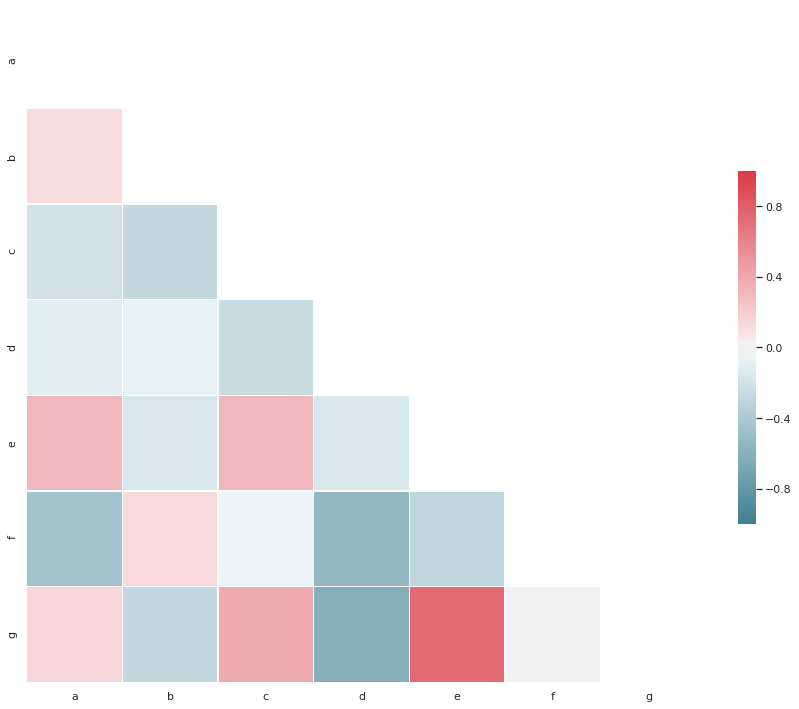

In [51]:
dsgutils.pd.viz.display_corr_matrix(df, on_columns=['a', 'b','c', 'd', 'e', 'f', 'g']);

Return the ax and put a title on it

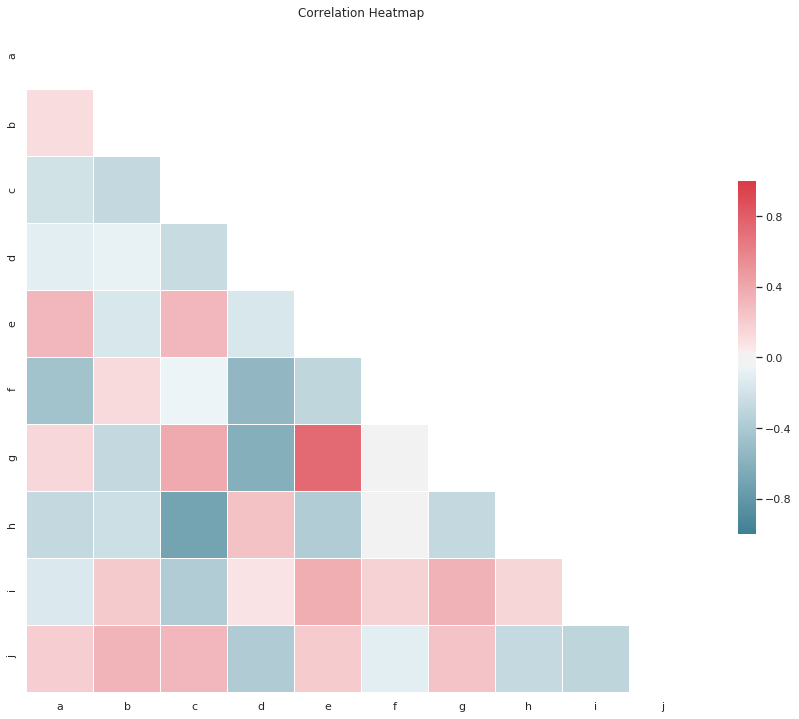

In [52]:
ax = dsgutils.pd.viz.display_corr_matrix(df, on_columns=list(ascii_letters[:10]))
ax.set_title('Correlation Heatmap');

Add a custom color map

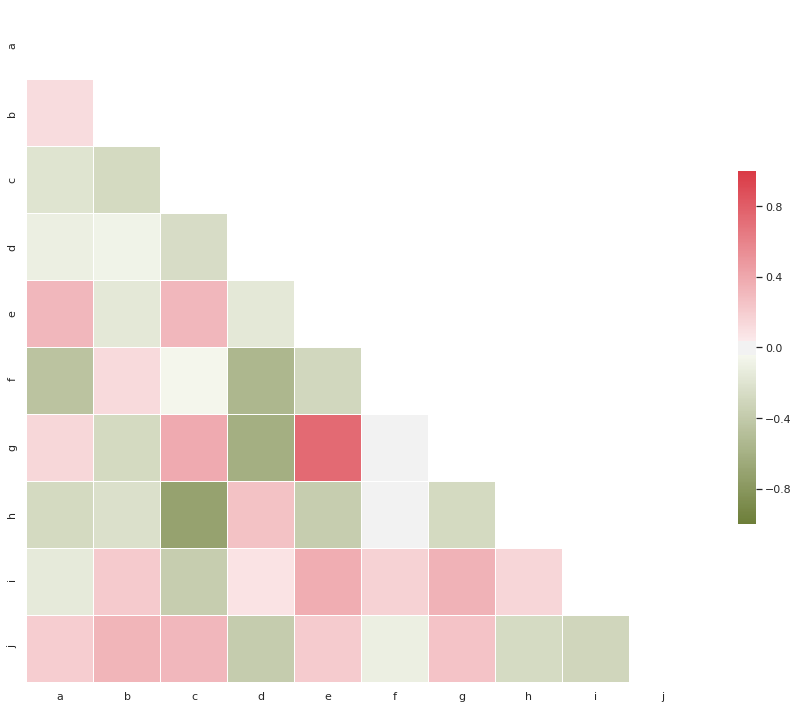

In [53]:
cmap = sns.diverging_palette(100, 10, as_cmap=True)
ax = dsgutils.pd.viz.display_corr_matrix(df, on_columns=list(ascii_letters[:10]), cmap=cmap);

#### `display_stacked_bar`

In [54]:
import string

In [55]:
main_column = list(string.ascii_uppercase[:5])  # A, B, C, D, E
stack_columns = list(string.ascii_lowercase[:3])

df = pd.DataFrame.from_dict({'Main': list(np.random.choice(main_column, 200, replace=True)),
                             'Stack': list(np.random.choice(stack_columns, 200, replace=True))})

In [56]:
df

,Main,Stack
0,B,b
1,A,b
2,B,a
3,E,b
4,B,b
5,E,b
6,E,a
7,C,a
8,A,a
9,C,c


Plot simple stacked bar plot

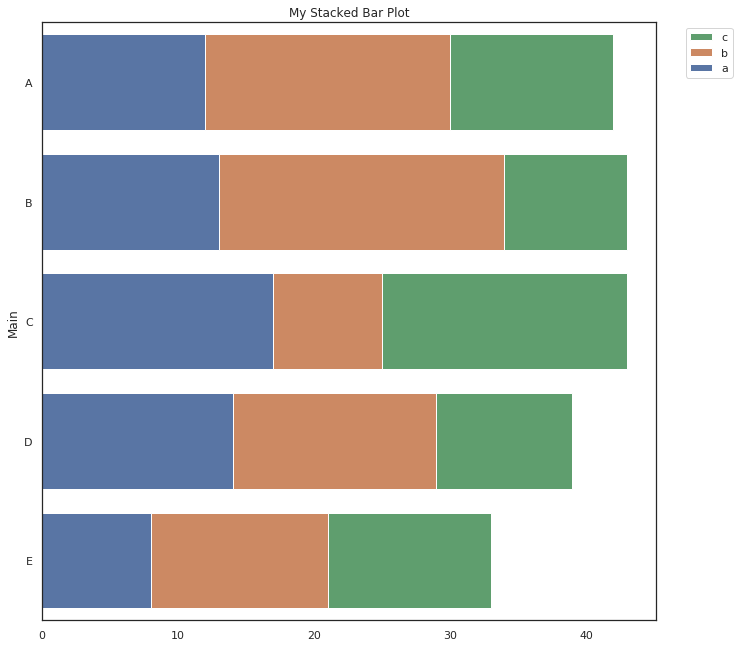

In [57]:
ax = dsgutils.pd.viz.display_stacked_cat_bar(df, groupby='Main', on='Stack')
ax.set(title='My Stacked Bar Plot');

Same plot, but vertical

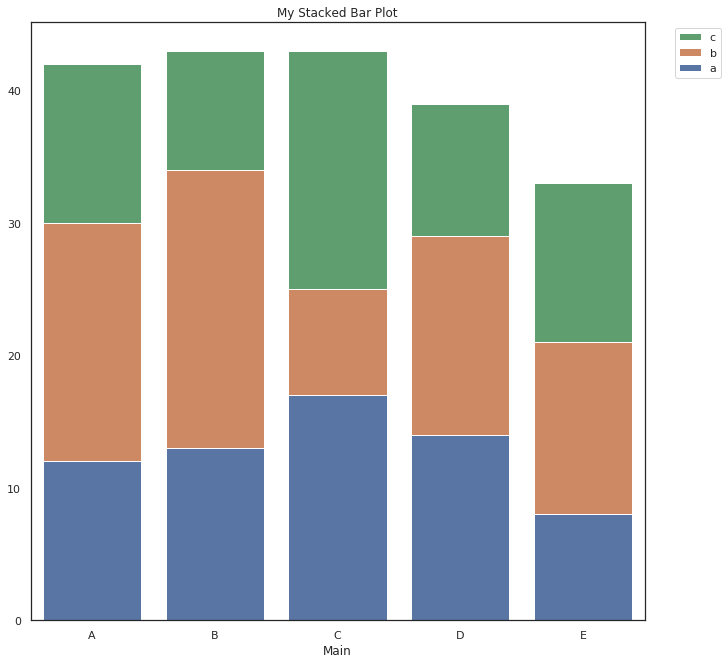

In [58]:
ax = dsgutils.pd.viz.display_stacked_cat_bar(df, groupby='Main', on='Stack', horizontal=False)
ax.set(title='My Stacked Bar Plot');

Plot the same barplot, but scale to a 100

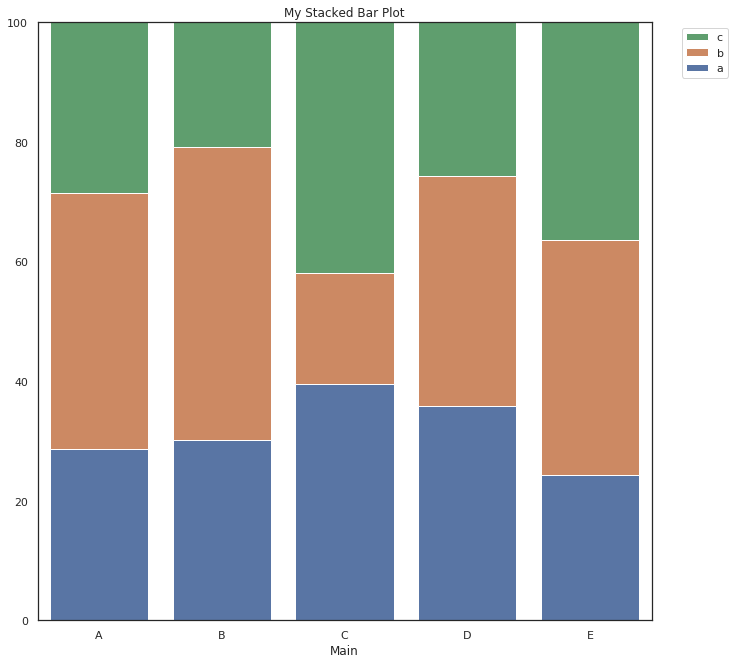

In [59]:
ax = dsgutils.pd.viz.display_stacked_cat_bar(df, groupby='Main', on='Stack', horizontal=False, unit=100)
ax.set(title='My Stacked Bar Plot');

Add your custum pallette

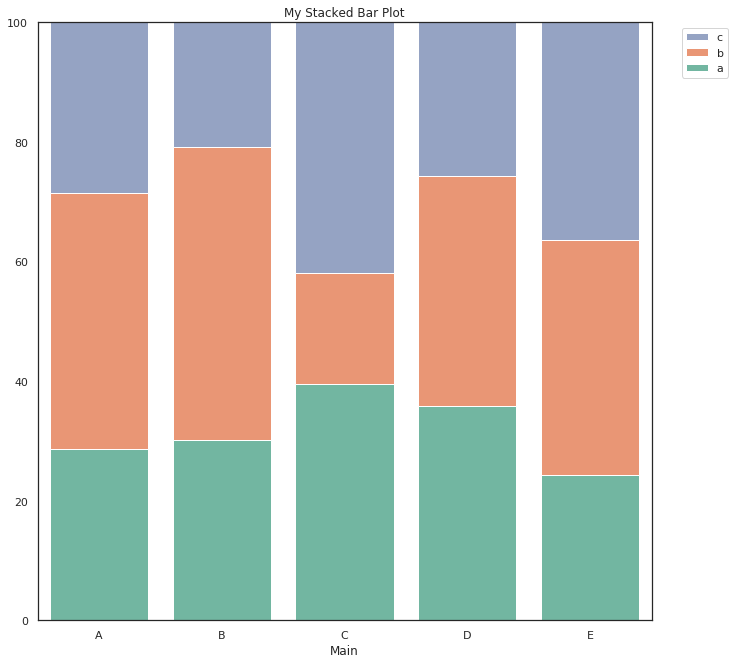

In [60]:
ax = dsgutils.pd.viz.display_stacked_cat_bar(df, groupby='Main', on='Stack', horizontal=False, unit=100, palette=sns.color_palette('Set2'))
ax.set(title='My Stacked Bar Plot');

####  `value_count_plot`

In [61]:
df_prod.head(5)

,product_id,store_id,customer_id,day_id,product_name,product_brand
0,9.0,2.0,36.0,1.0,short,nike
1,3.0,1.0,30.0,28.0,tee-shirt,addidas
2,9.0,2.0,11.0,3.0,basket,puma
3,10.0,0.0,15.0,13.0,tee-shirt,oxbow
4,7.0,2.0,20.0,0.0,short,puma


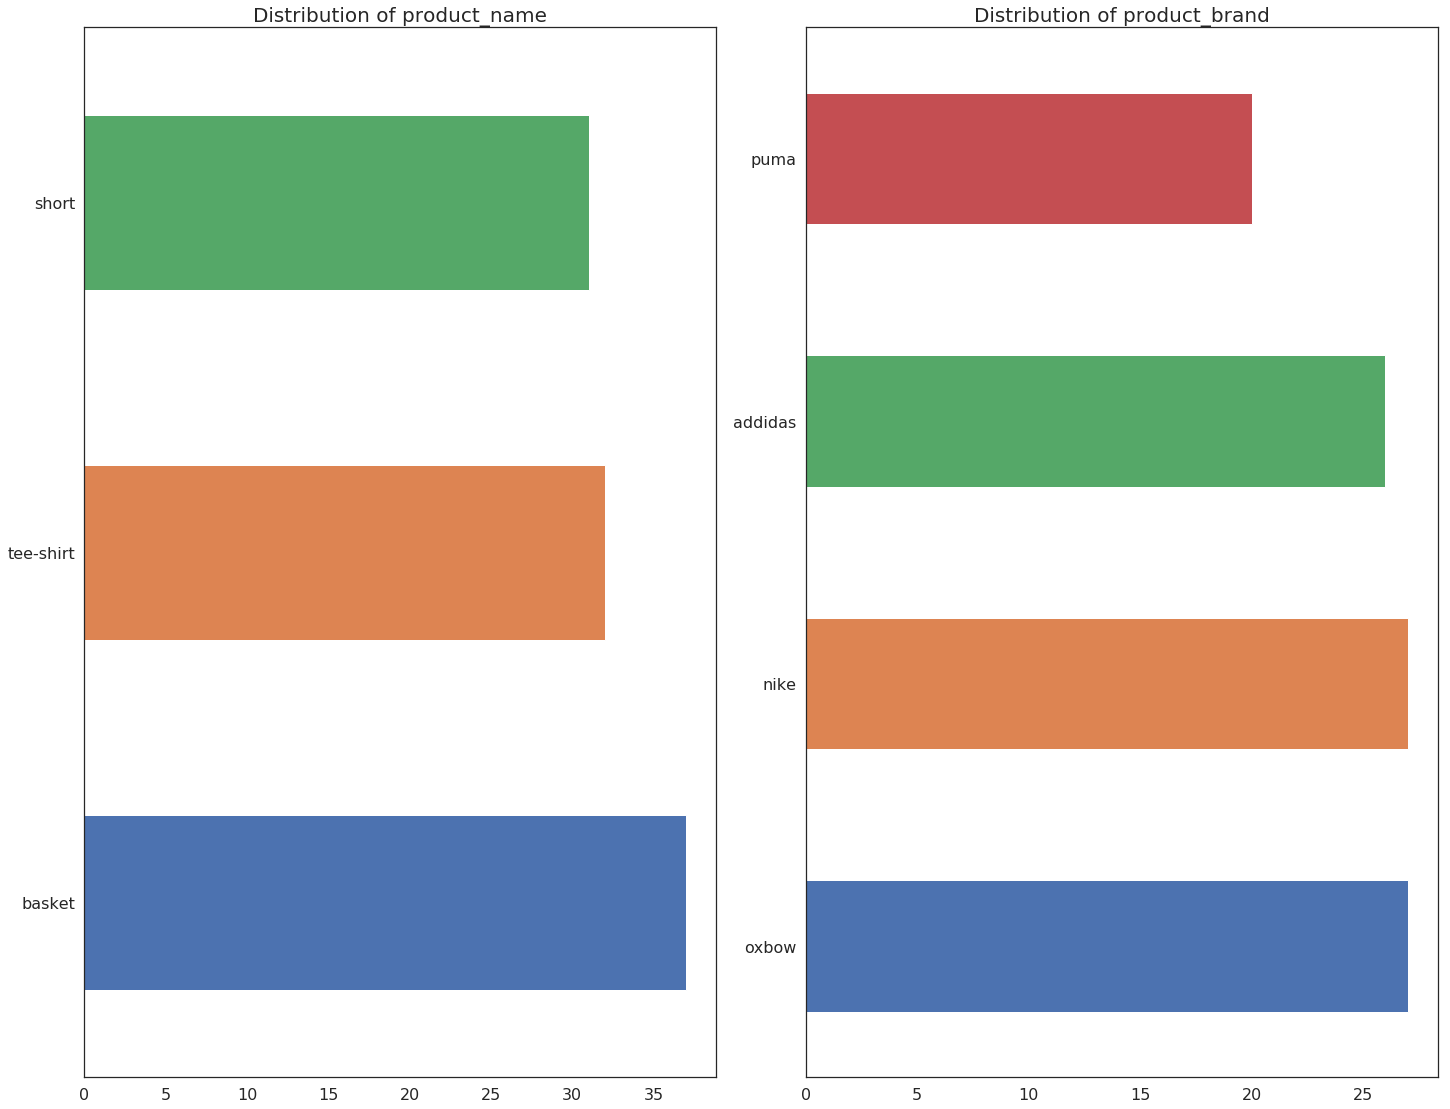

In [62]:
dsgutils.pd.viz.value_count_plot(df_prod, ['product_name', 'product_brand'], save_plot = False, path_dir = None )

#### `value_count_top`

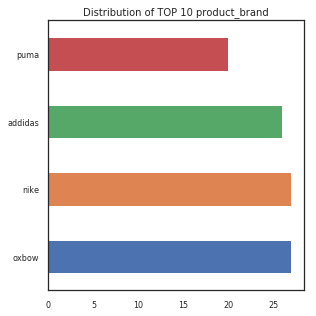

In [63]:
dsgutils.pd.viz.value_count_top(df_prod, ['product_brand'], save_plot = False, path_dir = None, top = 10 )

#### `value_count_bottom`

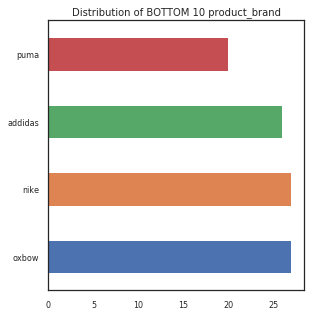

In [64]:
dsgutils.pd.viz.value_count_bottom(df_prod, ['product_brand'], save_plot = False, path_dir = None, bottom = 10 )

#### `distrib_numerical`

In [89]:
df_5 = pd.DataFrame(data= np.random.rand(100, 5)*15,
                 columns=list(ascii_letters[:5]))
df_5['a'] = np.round(df_5['a'])
df_5.head(10)

,a,b,c,d,e
0,8.0,11.807699,0.661293,4.469782,6.862333
1,8.0,9.922190,0.455526,3.231272,1.101759
2,3.0,7.742388,1.307779,10.083251,1.897587
3,6.0,8.509400,1.645261,4.440755,10.658981
4,9.0,4.045957,0.619581,3.185487,12.140528
5,7.0,11.645874,14.428927,1.921764,2.516701
6,2.0,12.804383,0.007217,5.588162,7.114734
7,11.0,14.467678,5.393765,14.133032,0.720984
8,11.0,14.983585,8.907586,11.289616,2.765257
9,14.0,6.866664,0.752125,5.475343,8.251950


/home/meghan/python3-dsgutils/dsgutilsenv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


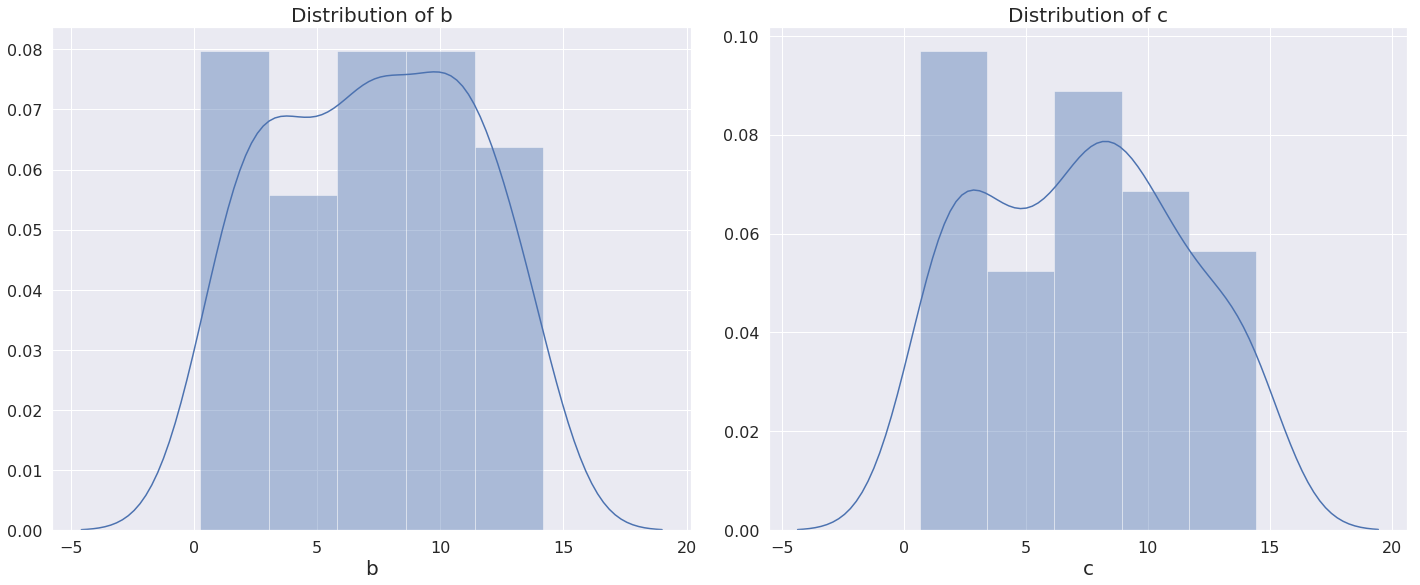

In [92]:
dsgutils.pd.viz.distrib_numerical(df_5, ['b', 'c'] , percentiles = 0.05, kde = True, save_plot = False, path_dir = None)

#### `box_plot_continuous`

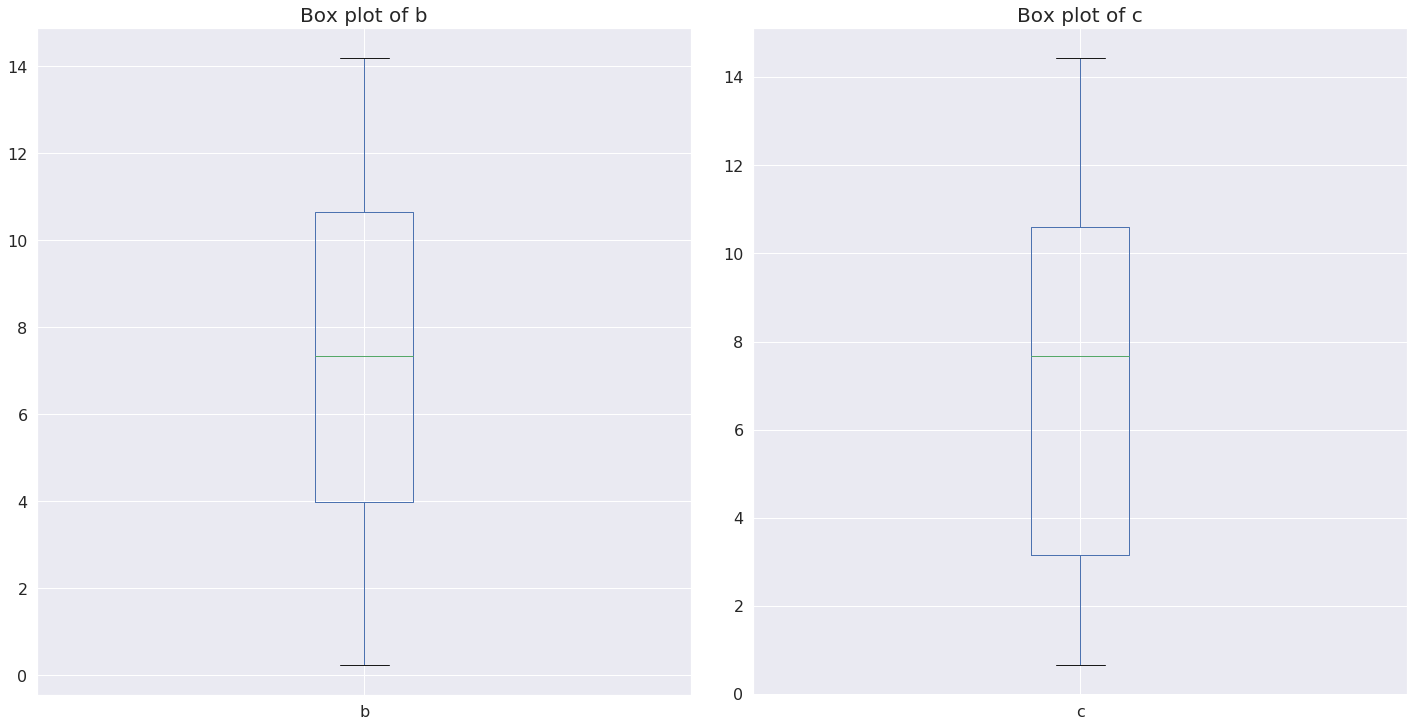

In [93]:
dsgutils.pd.viz.box_plot_continuous(df_5, ['b', 'c'], percentiles = 0.05, save_plot = False, path_dir = None)

#### `count_month_year`

In [94]:
df_prod['month'] = random.sample(['jan', 'fev', 'mars', 'april', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec']*100, k = 100)
df_prod['year']= random.sample(['2017', '2018']*100, k = 100)
df_prod.head(10)

,product_id,store_id,customer_id,day_id,product_name,product_brand,month,year,date
0,9.0,2.0,36.0,1.0,short,nike,fev,2017,2017-01-03
1,3.0,1.0,30.0,28.0,tee-shirt,addidas,jan,2017,2017-01-10
2,9.0,2.0,11.0,3.0,basket,puma,aug,2018,2018-01-06
3,10.0,0.0,15.0,13.0,tee-shirt,oxbow,may,2017,2018-01-08
4,7.0,2.0,20.0,0.0,short,puma,aug,2017,2018-01-03
5,0.0,2.0,33.0,20.0,basket,oxbow,june,2018,2017-01-11
6,7.0,1.0,28.0,9.0,short,puma,april,2018,2017-01-01
7,4.0,1.0,39.0,1.0,basket,oxbow,april,2017,2017-01-07
8,1.0,1.0,21.0,1.0,tee-shirt,nike,dec,2018,2017-01-12
9,1.0,2.0,44.0,29.0,tee-shirt,puma,june,2018,2017-01-04


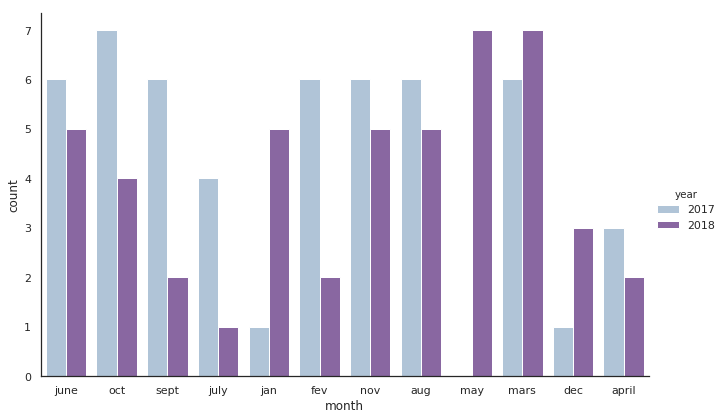

In [70]:
dsgutils.pd.viz.count_month_year (df_prod,'month','year', save_plot = False, path_dir = None)

#### `count_plot_col_per_date`

In [71]:
df_prod['date'] =random.sample(['01/01/2017', '01/02/2017','01/03/2017', '01/04/2017','01/05/2017', '01/06/2017', '01/07/2017', '01/08/2017', '01/09/2017', '01/10/2017', '01/11/2017', '01/12/2017',
                               '01/01/2018', '01/02/2018','01/03/2018', '01/04/2018','01/05/2018', '01/06/2018', '01/07/2018', '01/08/2018', '01/09/2018', '01/10/2018', '01/11/2018', '01/12/2018']*100, k = 100)
df_prod['date'] = pd.to_datetime(df_prod['date'])

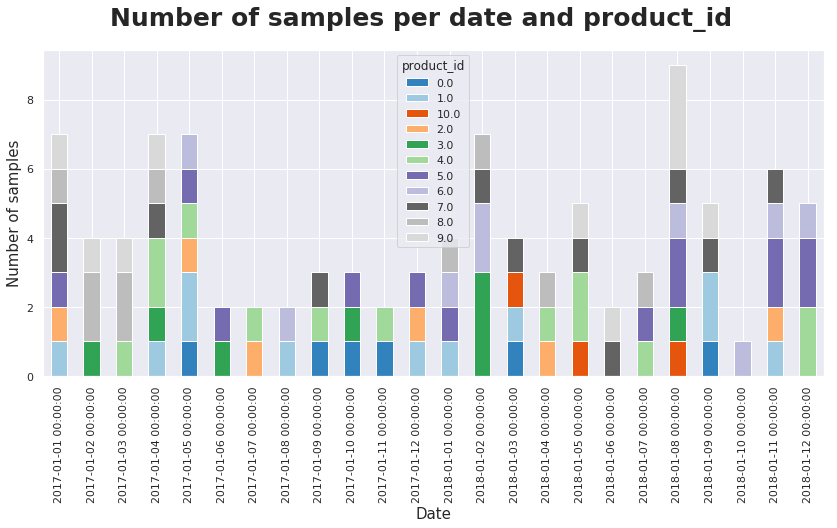

In [72]:
dsgutils.pd.viz.count_plot_col_per_date(df_prod, 'date', 'product_id', num_label = 1, save_plot = False, path_dir = None)

#### `countplot_cat1`

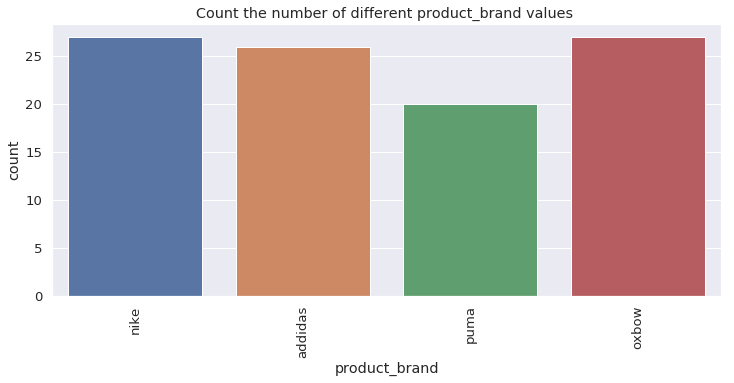

In [76]:
dsgutils.pd.viz.countplot_cat1(df_prod, 'product_brand', title_suffix = '', perc = False, num_label = 1, save_plot = False, path_dir = None)

#### `density_plot_cat1`

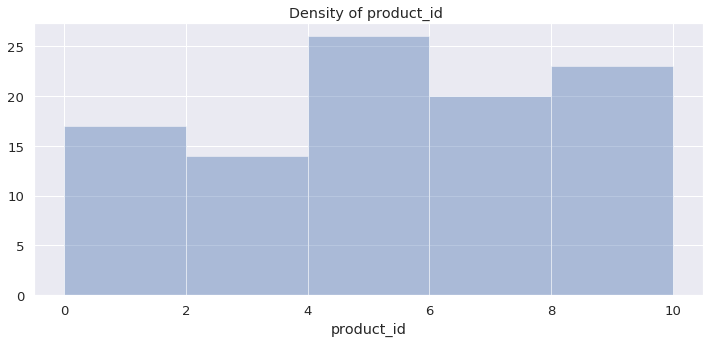

In [121]:
df_prod['product_id'] =df_prod['product_id'].astype(float)
dsgutils.pd.viz.density_plot_cat1(df_prod, 'product_id', bins =5, kde = False, title_suffix = '', save_plot = False, path_dir = None )

#### `num_of_cat2_per_cat1`

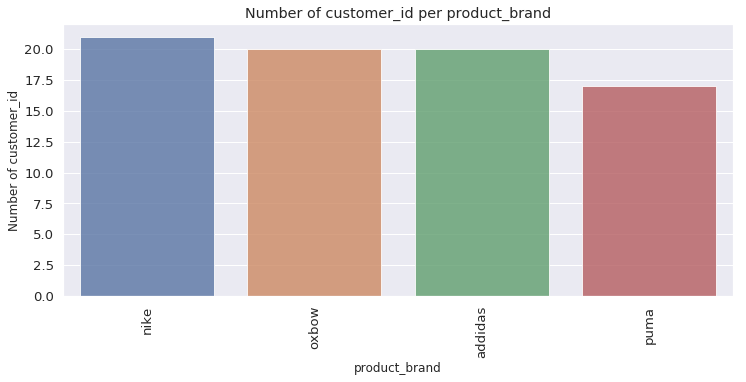

In [77]:
dsgutils.pd.viz.num_of_cat2_per_cat1(df_prod, 'product_brand', 'customer_id', figsize=(12,5), normalize = False, num_label = 1, save_plot = False, path_dir = None )

#### `count_of_cat2_per_cat1`

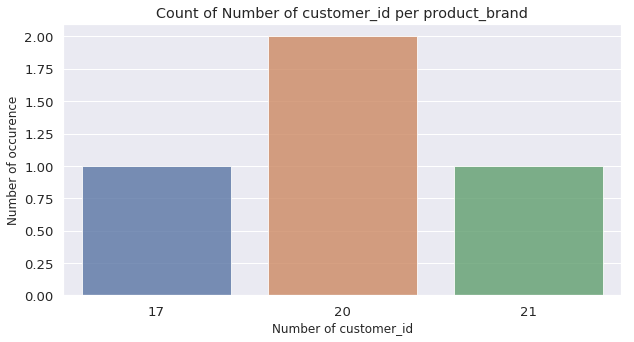

In [78]:
dsgutils.pd.viz.count_of_cat2_per_cat1(df_prod, 'product_brand', 'customer_id', figsize=(10,5), xlim =None, ylim= None, num_label =1, save_plot = False, path_dir = None)

#### `count_of_cat3_per_cat1cat2`

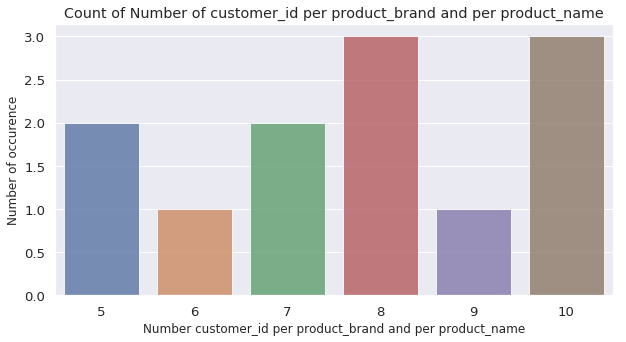

In [79]:
dsgutils.pd.viz.count_of_cat3_per_cat1cat2(df_prod, 'product_brand', 'product_name', 'customer_id', num_label=1, save_plot = False, path_dir = None )

#### `boxplot_2_features`

In [95]:
df_5.head()

,a,b,c,d,e
0,8.0,11.807699,0.661293,4.469782,6.862333
1,8.0,9.922190,0.455526,3.231272,1.101759
2,3.0,7.742388,1.307779,10.083251,1.897587
3,6.0,8.509400,1.645261,4.440755,10.658981
4,9.0,4.045957,0.619581,3.185487,12.140528


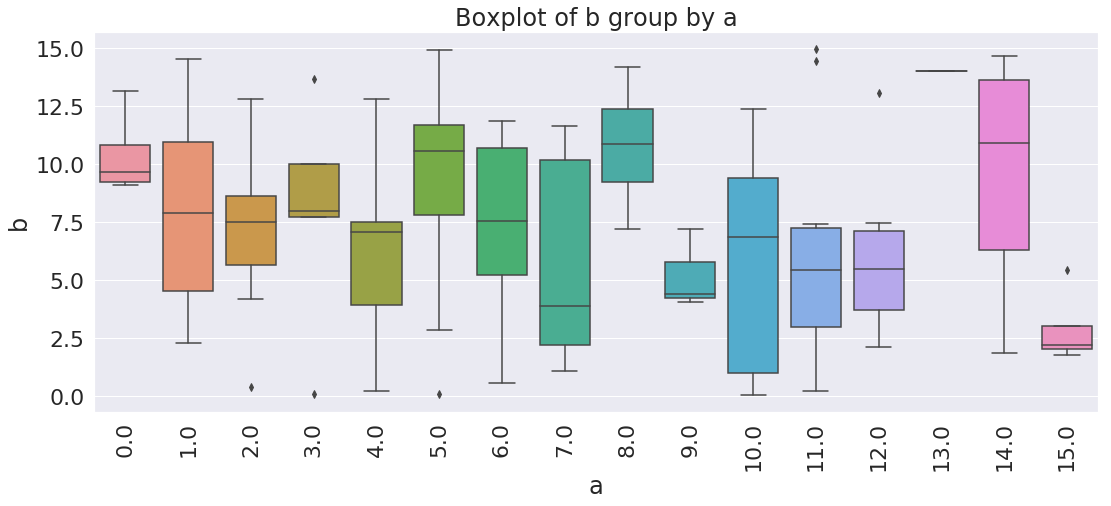

In [96]:
dsgutils.pd.viz.boxplot_2_features(df_5, 'a', 'b', ylim_i = 0, set_y_limit = False, order_boxplot = False, print_value = False, num_label = 1, save_plot = False, path_dir = None)

#### `scatter_2_features`

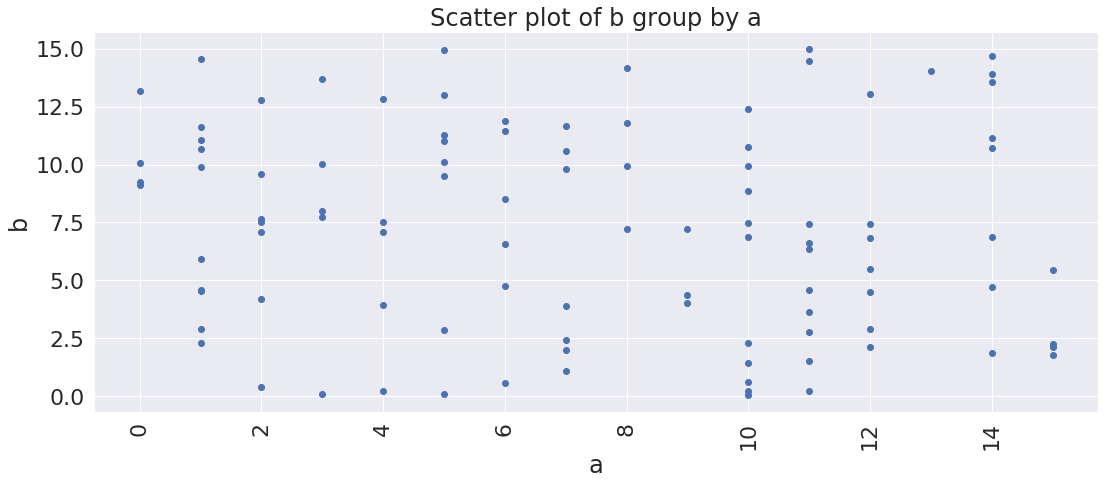

In [97]:
dsgutils.pd.viz.scatter_2_features(df_5, 'a', 'b', ylim_i = 0, set_y_limit = False, xlim_i = 0, set_x_limit = False, order_boxplot = False, print_value = False, num_label = 1)

#### `stackedBarPlot`

In [ ]:
df_prod.head()

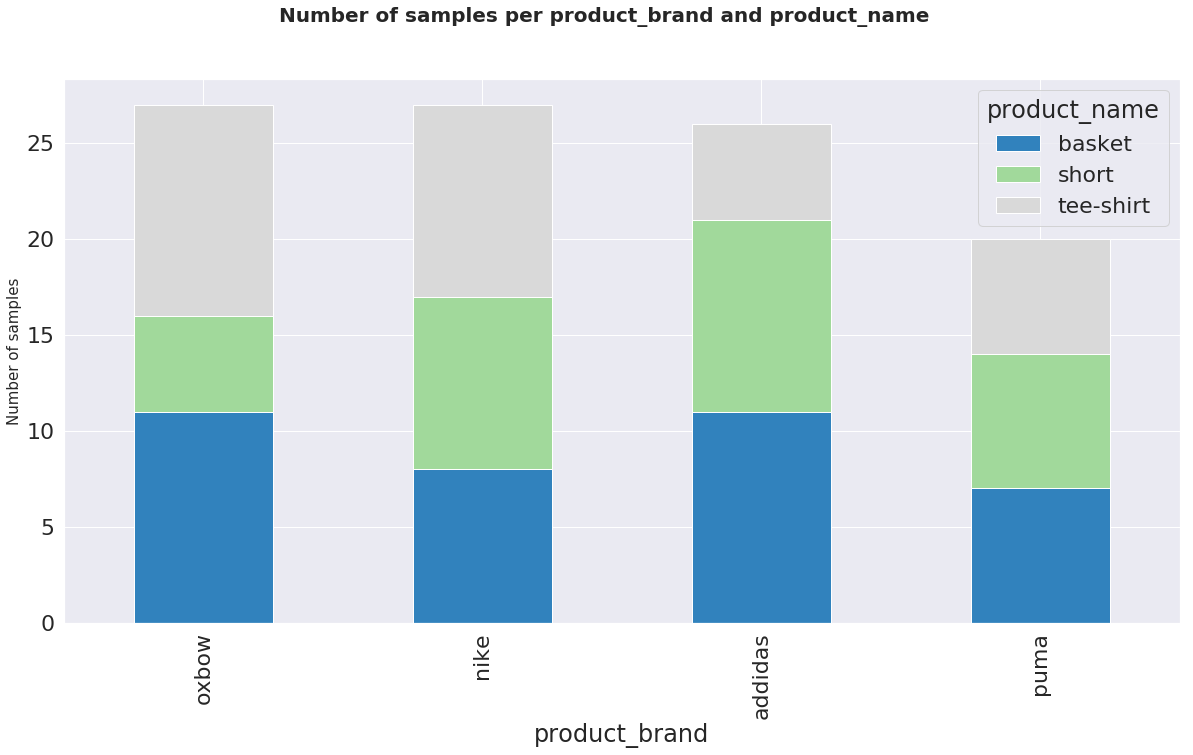

In [83]:
dsgutils.pd.viz.stackedBarPlot(df_prod, 'product_brand', 'product_name', bar_size=30, nan_colums_thresh=0, figsize=(20, 10), percentile=0.001, plot_flag = 1, normalize = False, sort_bars = True, return_pivot = False)

#### `plot_correlations_per_categories`

In [108]:
from scipy import stats

def CalculateSpearmanCorrelation(df, group_x, group_y, cat1, cat2, feature_x, target_y):
    # select the current correlation slice
    df_curr = df.loc[(df[cat1] == group_x) & (df[cat2] == group_y), [cat1, cat2, feature_x, target_y]]
    # drop NAs
    df_curr.dropna(inplace=True)
    # Calculate the Spearman correlation
    corr_i, p_value = stats.spearmanr(df_curr[feature_x], df_curr[target_y])
    return(corr_i)

df_prod['Correlation'] = df_prod.apply(lambda x :
                                       CalculateSpearmanCorrelation(df_prod, x['product_brand'], x['product_name'], 'product_brand',
                                                                    'product_name', 'customer_id', 'store_id'), axis=1 )

/home/meghan/python3-dsgutils/dsgutilsenv/lib/python3.5/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0.22821773229381923


In [109]:
df_prod

,product_id,store_id,customer_id,day_id,product_name,product_brand,month,year,date,Correlation
0,9.0,2.0,36.0,1.0,short,nike,fev,2017,2017-01-03,0.228218
1,3.0,1.0,30.0,28.0,tee-shirt,addidas,jan,2017,2017-01-10,0.223607
2,9.0,2.0,11.0,3.0,basket,puma,aug,2018,2018-01-06,0.580073
3,10.0,0.0,15.0,13.0,tee-shirt,oxbow,may,2017,2018-01-08,-0.494465
4,7.0,2.0,20.0,0.0,short,puma,aug,2017,2018-01-03,0.059761
5,0.0,2.0,33.0,20.0,basket,oxbow,june,2018,2017-01-11,-0.033856
6,7.0,1.0,28.0,9.0,short,puma,april,2018,2017-01-01,0.059761
7,4.0,1.0,39.0,1.0,basket,oxbow,april,2017,2017-01-07,-0.033856
8,1.0,1.0,21.0,1.0,tee-shirt,nike,dec,2018,2017-01-12,0.349601
9,1.0,2.0,44.0,29.0,tee-shirt,puma,june,2018,2017-01-04,0.882735


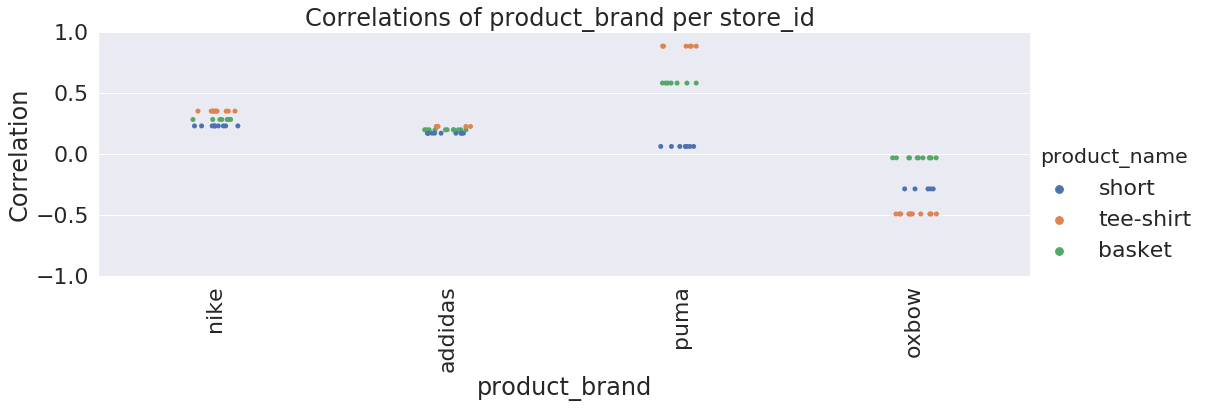

In [110]:
dsgutils.pd.viz.plot_correlations_per_categories(df_prod, 'product_brand', 'product_name', feature_x = 'product_brand', target_y = 'store_id', title_suffix = '')